<a href="https://colab.research.google.com/github/qilinli/COMP6013-Pracs/blob/main/COMP6013_Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP6013 Prac1 - Linear Regression
In this practical, we will cover the basic usage of linear regression. We will go through the univariate linear regression and multivariate linear regression toghther. And then you will use linear regression to predict the house price on a real world dataset.

**Learning outcomes**: by completing this practical, you will learn:


*   how to use Google Colab as could notebook
*   how to use pandas library for basic data manipulation
*   how to use scikit-learn to build machine learning models
*   how to use linear regression for quantity prediction



## Univariate Linear Regression
We begin with importing few standard libraries.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np

%matplotlib inline

sns.set_theme()

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = mx + b
$$
where $m$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

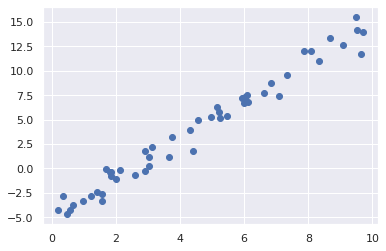

In [ ]:
seed = 42 # random seed
n = 50 # number of data points

rng = np.random.RandomState(seed)
x = 10 * rng.rand(n)
y = 2 * x - 5 + rng.randn(n)
plt.scatter(x, y);

We now build a linear regression model to fit the data. We use the [scikit learn](https://scikit-learn.org/stable/) library.

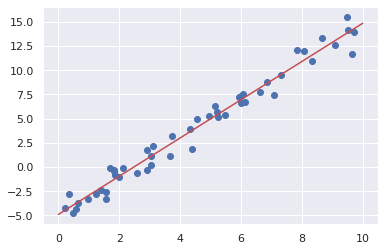

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialise a linear regression model
model = LinearRegression(fit_intercept=True)

# Train the model with data generated above
model.fit(x[:, np.newaxis], y)  # API requires a 2d array

# Inference/Predict on test data
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope (m):    ", model.coef_[0])
print("Model intercept (b):", model.intercept_)

Model slope (m):     1.9776566003853107
Model intercept (b): -4.903310725531115


We see that the results are very close to the inputs, as we might hope. (not perfect as random noise is added to $y$

## Multivariate Linear Regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multivariate linear models of the form
$$
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multivariate nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(seed)
X = 10 * rng.rand(n, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

## Linear Regression with a Real Dataset - Califorlia House Price Prediction
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset should be available in "/content/sample_data/california_housing_traing.csv". Otherwise it can be downloaded from [here](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv).

Let's first load the dataset using [pandas](https://pandas.pydata.org/).

In [ ]:
import pandas as pd

df_train = pd.read_csv("./sample_data/california_housing_train.csv")
df_test = pd.read_csv("./sample_data/california_housing_test.csv")

# Examine the dataset using pandas functions
df_train.info()
df_test.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housin

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now, train a linear regression model using ``df_train`` and make prediction on ``df_test``.